<a href="https://colab.research.google.com/github/yogi753/Air-Sense/blob/main/Ensemled_LGBM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('city_hour.csv')

# Check for missing values
print(data.isnull().sum())


City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64


In [ ]:
# Impute missing values in the AQI column using the mean value
data['AQI'] = data['AQI'].fillna(data['AQI'].mean())
data['PM2.5'] = data['PM2.5'].fillna(data['PM2.5'].mean())
data['PM10'] = data['PM10'].fillna(data['PM10'].mean())
data['NO'] = data['NO'].fillna(data['NO'].mean())
data['NO2'] = data['NO2'].fillna(data['NO2'].mean())
data['NOx'] = data['NOx'].fillna(data['NOx'].mean())
data['NH3'] = data['NH3'].fillna(data['NH3'].mean())
data['CO'] = data['CO'].fillna(data['CO'].mean())
data['SO2'] = data['SO2'].fillna(data['SO2'].mean())
data['O3'] = data['O3'].fillna(data['O3'].mean())
data['Benzene'] = data['Benzene'].fillna(data['Benzene'].mean())
data['Toluene'] = data['Toluene'].fillna(data['Toluene'].mean())
data['Xylene'] = data['Xylene'].fillna(data['Xylene'].mean())
# Check for missing values again
print(data.isnull().sum())

City               0
Datetime           0
PM2.5              0
PM10               0
NO                 0
NO2                0
NOx                0
NH3                0
CO                 0
SO2                0
O3                 0
Benzene            0
Toluene            0
Xylene             0
AQI                0
AQI_Bucket    129080
dtype: int64


In [ ]:
# Checking shape and data types of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   City        707875 non-null  object        
 1   Datetime    707875 non-null  datetime64[ns]
 2   PM2.5       562787 non-null  float64       
 3   PM10        411138 non-null  float64       
 4   NO          591243 non-null  float64       
 5   NO2         590753 non-null  float64       
 6   NOx         584651 non-null  float64       
 7   NH3         435333 non-null  float64       
 8   CO          621358 non-null  float64       
 9   SO2         577502 non-null  float64       
 10  O3          578667 non-null  float64       
 11  Benzene     544229 non-null  float64       
 12  Toluene     487268 non-null  float64       
 13  Xylene      252046 non-null  float64       
 14  AQI         578795 non-null  float64       
 15  AQI_Bucket  578795 non-null  object        
dtypes:

**Weekly Analysis**

In [ ]:
# import pandas as pd
# import numpy as np
# import lightgbm as lgb
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# # Define the Mean Absolute Percentage Error (MAPE) function
# def mean_absolute_percentage_error(y_true, y_pred):
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# # Load your air quality data
# # Replace this with your actual data loading code
# data = pd.read_csv('city_hour.csv')

# # Convert the 'Datetime' column to datetime type
# data['Datetime'] = pd.to_datetime(data['Datetime'])

# # Prepare the data for analysis (weekly)
# week = data.groupby([pd.Grouper(key='Datetime', freq='W')]).mean()

# # Define the target variable (AQI)
# target_variable = 'AQI'

# # Function to create features for modeling
# def create_features(df):
#     # Add any additional features you may have
#     # For simplicity, we'll use only the 'AQI' lag features
#     for i in range(1, 4):  # Lag features for the last 3 time steps
#         df[f'{target_variable}_lag_{i}'] = df[target_variable].shift(i)
#     return df

# # Apply feature engineering to weekly data
# week = create_features(week)

# # Define the features (X) and target (y)
# week_features = [col for col in week.columns if col != target_variable]

# # Split the data into training and testing sets for weekly
# week_train, week_test = train_test_split(week, test_size=0.2, shuffle=False)

# # Initialize LightGBM model for weekly prediction
# week_model = lgb.LGBMRegressor()

# # Train the model
# week_model.fit(week_train[week_features], week_train[target_variable])

# # Make predictions on the testing data
# week_pred = week_model.predict(week_test[week_features])

# # Calculate evaluation metrics
# week_rmse = np.sqrt(mean_squared_error(week_test[target_variable], week_pred))
# week_mae = mean_absolute_error(week_test[target_variable], week_pred)
# week_r2 = r2_score(week_test[target_variable], week_pred)
# week_mape = mean_absolute_percentage_error(week_test[target_variable], week_pred)
# week_mse = mean_squared_error(week_test[target_variable], week_pred)

# # Print the evaluation metrics for weekly prediction
# print("Weekly Prediction Metrics:")
# print(f"RMSE: {week_rmse:.2f}")
# print(f"MAE: {week_mae:.2f}")
# print(f"R-squared: {week_r2:.2f}")
# print(f"MAPE: {week_mape:.2f}%")
# print(f"MSE: {week_mse:.2f}")

# # Plot the actual vs. predicted AQI values for weekly
# plt.plot(week_test.index, week_test[target_variable], label='Actual', color='blue')
# plt.plot(week_test.index, week_pred, label='Predicted', color='red')
# plt.xlabel('Date')
# plt.ylabel('AQI')
# plt.title('Weekly AQI Prediction')
# plt.legend()
# plt.show()

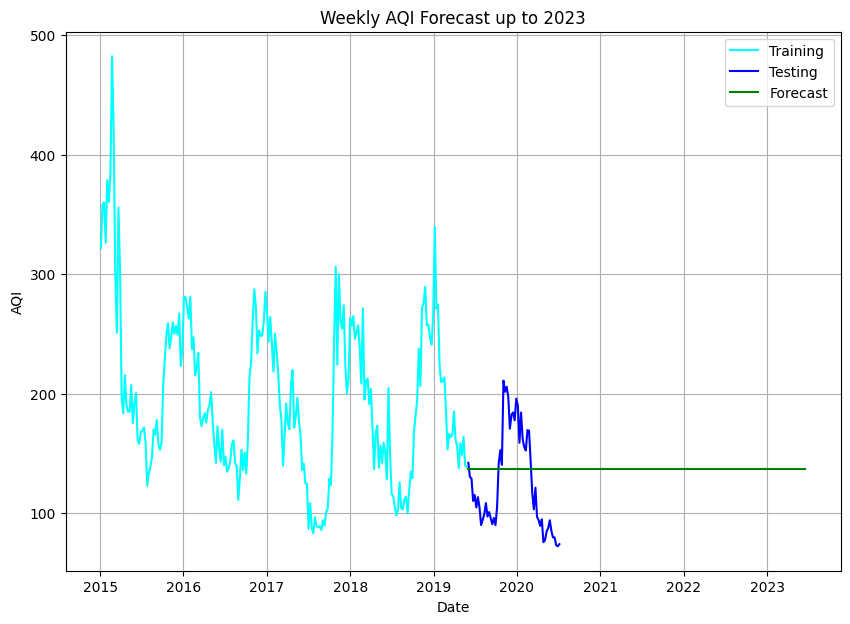

In [ ]:
# Function to perform forecast and plot with different labels for training, testing, and forecasting
def perform_forecast_and_plot(model, features, target_variable, forecast_dates, train_data, test_data):
    # Create a dataframe for the forecast period with these dates as the index
    forecast_data = pd.DataFrame(index=forecast_dates)

    # Check if the selected features are present in the original data and only use those features
    selected_features = [col for col in features if col in train_data.columns]

    # Use training data for lag features
    forecast_data[selected_features] = train_data[selected_features]

    # Use the provided model to make predictions for the forecast period
    forecast_predictions = []
    for date in forecast_dates:
        # Predict based on the available data points in the forecast data
        forecast_point = forecast_data.loc[:date]
        forecast_point_pred = model.predict(forecast_point[selected_features])
        forecast_predictions.append(forecast_point_pred[-1])

    # Plot the observed data, training, testing, and forecast
    plt.figure(figsize=(10, 7))
    plt.plot(train_data.index, train_data[target_variable], label='Training', color='cyan')
    plt.plot(test_data.index, test_data[target_variable], label='Testing', color='blue')
    plt.plot(forecast_dates, forecast_predictions, label='Forecast', color='green')

    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.title("Weekly AQI Forecast up to 2023")
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the number of steps to cover until 2023 (adjust as needed)
steps_until_2023 = 212  # For weekly predictions up to 2023

# Get the last available data point
last_date = week.index[-1]

# # Split the data into training and testing sets for weekly
train_ratio = 0.8  # 80% for training, 20% for testing
train_size = int(len(week) * train_ratio)
train_data = week.iloc[:train_size]
test_data = week.iloc[train_size:]

# # Generate a date range for the forecast period starting from the last date in the training data
forecast_dates = pd.date_range(start=train_data.index[-1] + pd.DateOffset(days=7), periods=steps_until_2023, freq='W')

# # Perform the forecast and plot with different labels
perform_forecast_and_plot(week_model, week_features, target_variable, forecast_dates, train_data, test_data)


<ipython-input-13-f688b08251d2>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week = data.groupby([pd.Grouper(key='Datetime', freq='W')]).mean()


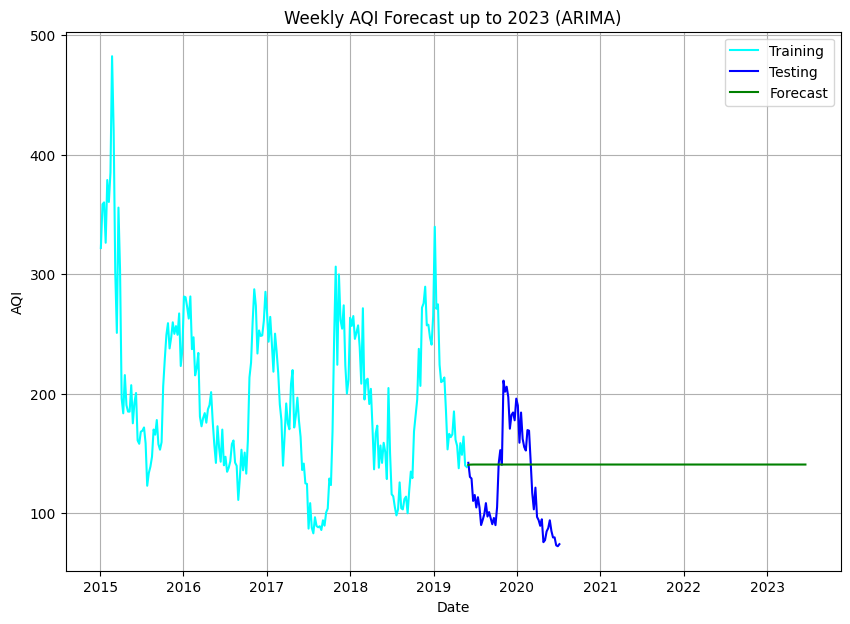

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your air quality data
# Replace this with your actual data loading code
data = pd.read_csv('city_hour.csv')

# Convert the 'Datetime' column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Prepare the data for analysis (weekly)
week = data.groupby([pd.Grouper(key='Datetime', freq='W')]).mean()

# Define the target variable (AQI)
target_variable = 'AQI'

# Split the data into training and testing sets for weekly
train_ratio = 0.8  # 80% for training, 20% for testing
train_size = int(len(week) * train_ratio)
train_data = week.iloc[:train_size]
test_data = week.iloc[train_size:]

# Fit an ARIMA model to the training data
p, d, q = 1, 1, 1  # Example values for ARIMA order
model = ARIMA(train_data[target_variable], order=(p, d, q))
arima_results = model.fit()

# Define the number of steps to forecast
steps_until_2023 = 212  # For weekly predictions up to 2023

# Generate a date range for the forecast period
forecast_dates = pd.date_range(start=train_data.index[-1] + pd.DateOffset(days=7), periods=steps_until_2023, freq='W')

# Perform dynamic forecasting with ARIMA
forecast_predictions = arima_results.forecast(steps_until_2023)

# Plot the observed data, training, and forecast
plt.figure(figsize=(10, 7))
plt.plot(train_data.index, train_data[target_variable], label='Training', color='cyan')
plt.plot(test_data.index, test_data[target_variable], label='Testing', color='blue')
plt.plot(forecast_dates, forecast_predictions, label='Forecast', color='green')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title("Weekly AQI Forecast up to 2023 (ARIMA)")
plt.legend()
plt.grid(True)
plt.show()

**Week wise analysis**

In [ ]:
# import pandas as pd
# import numpy as np
# import lightgbm as lgb
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# # Define the Mean Absolute Percentage Error (MAPE) function
# def mean_absolute_percentage_error(y_true, y_pred):
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# # Load your air quality data
# # Replace this with your actual data loading code
# data = pd.read_csv('city_hour.csv')

# # Convert the 'Datetime' column to datetime type
# data['Datetime'] = pd.to_datetime(data['Datetime'])

# # Prepare the data for analysis (weekly)
# week = data.groupby([pd.Grouper(key='Datetime', freq='W')]).mean()

# # Define the target variable (AQI)
# target_variable = 'AQI'

# # Define the features you want to include for modeling
# selected_features = ['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'O3']

# # Function to create features for modeling
# def create_features(df):
#     # Add any additional features you may have
#     # For simplicity, we'll use only the selected features as lag features
#     for i in range(1, 4):  # Lag features for the last 3 time steps
#         for feature in selected_features:
#             df[f'{feature}_lag_{i}'] = df[feature].shift(i)
#     return df

# # Apply feature engineering to weekly data
# week = create_features(week)

# # Define the features (X) and target (y) using the selected features
# week_features = [col for col in week.columns if col in selected_features]
# # If you want to include lag features, add them to week_features as well

# # Split the data into training and testing sets for weekly
# week_train, week_test = train_test_split(week, test_size=0.2, shuffle=False)

# # Initialize LightGBM model for weekly prediction
# week_model = lgb.LGBMRegressor()

# # Train the model using the selected features
# week_model.fit(week_train[week_features], week_train[target_variable])

# # Make predictions on the testing data
# week_pred = week_model.predict(week_test[week_features])

# # Calculate evaluation metrics
# week_rmse = np.sqrt(mean_squared_error(week_test[target_variable], week_pred))
# week_mae = mean_absolute_error(week_test[target_variable], week_pred)
# week_r2 = r2_score(week_test[target_variable], week_pred)
# week_mape = mean_absolute_percentage_error(week_test[target_variable], week_pred)
# week_mse = mean_squared_error(week_test[target_variable], week_pred)

# # Print the evaluation metrics for weekly prediction
# print("Weekly Prediction Metrics:")
# print(f"RMSE: {week_rmse:.2f}")
# print(f"MAE: {week_mae:.2f}")
# print(f"R-squared: {week_r2:.2f}")
# print(f"MAPE: {week_mape:.2f}%")
# print(f"MSE: {week_mse:.2f}")

# # Plot the actual vs. predicted AQI values for weekly
# plt.plot(week_test.index, week_test[target_variable], label='Actual', color='blue')
# plt.plot(week_test.index, week_pred, label='Predicted', color='red')
# plt.xlabel('Date')
# plt.ylabel('AQI')
# plt.title('Weekly AQI Prediction')
# plt.legend()
# plt.show()

**Monthly Analysis**

In [ ]:
# import pandas as pd
# import numpy as np
# import lightgbm as lgb
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# # Define the Mean Absolute Percentage Error (MAPE) function
# def mean_absolute_percentage_error(y_true, y_pred):
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# # Load your air quality data
# # Replace this with your actual data loading code
# data = pd.read_csv('city_hour.csv')

# # Convert the 'Datetime' column to datetime type
# data['Datetime'] = pd.to_datetime(data['Datetime'])

# # Prepare the data for analysis (monthly)
# month = data.groupby([pd.Grouper(key='Datetime', freq='M')]).mean()  # Monthly aggregation

# # Define the target variable (AQI)
# target_variable = 'AQI'

# # Define the features you want to include for modeling
# selected_features = ['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'O3']

# # Function to create features for modeling
# def create_features(df):
#     # Add any additional features you may have
#     # For simplicity, we'll use only the selected features as lag features
#     for i in range(1, 4):  # Lag features for the last 3 time steps
#         for feature in selected_features:
#             df[f'{feature}_lag_{i}'] = df[feature].shift(i)
#     return df

# # Apply feature engineering to monthly data
# month = create_features(month)

# # Define the features (X) and target (y) using the selected features
# month_features = [col for col in month.columns if col in selected_features]
# # If you want to include lag features, add them to month_features as well

# # Split the data into training and testing sets for monthly
# month_train, month_test = train_test_split(month, test_size=0.2, shuffle=False)

# # Initialize LightGBM model for monthly prediction
# month_model = lgb.LGBMRegressor()

# # Train the model using the selected features
# month_model.fit(month_train[month_features], month_train[target_variable])

# # Make predictions on the testing data
# month_pred = month_model.predict(month_test[month_features])

# # Calculate evaluation metrics
# month_rmse = np.sqrt(mean_squared_error(month_test[target_variable], month_pred))
# month_mae = mean_absolute_error(month_test[target_variable], month_pred)
# month_r2 = r2_score(month_test[target_variable], month_pred)
# month_mape = mean_absolute_percentage_error(month_test[target_variable], month_pred)
# month_mse = mean_squared_error(month_test[target_variable], month_pred)

# # Print the evaluation metrics for monthly prediction
# print("Monthly Prediction Metrics:")
# print(f"RMSE: {month_rmse:.2f}")
# print(f"MAE: {month_mae:.2f}")
# print(f"R-squared: {month_r2:.2f}")
# print(f"MAPE: {month_mape:.2f}%")
# print(f"MSE: {month_mse:.2f}")

# # Plot the actual vs. predicted AQI values for monthly
# plt.plot(month_test.index, month_test[target_variable], label='Actual', color='blue')
# plt.plot(month_test.index, month_pred, label='Predicted', color='red')
# plt.xlabel('Date')
# plt.ylabel('AQI')
# plt.title('Monthly AQI Prediction')
# plt.legend()
# plt.show()


In [ ]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame from the regression metrics
metrics_df = pd.DataFrame({
    'LGBM Model': ['Month Wise','Week Wise'],
    'RMSE': ['15.65','9.78'],
    'MAE': ['13.57','8.45'],
    'MAPE':['13.92','8.20'],
    'MSE':['244.88','95.60'],
    'R-Square':['0.85','0.94']
})

# Set the index to the 'Metric' column
metrics_df = metrics_df.set_index('LGBM Model')
table_heading = "Performance Result :"

# Convert the DataFrame to a tabular format with borders
table = tabulate(metrics_df, headers='keys', tablefmt='pretty', numalign='center')

# Display the table
print(table_heading)
print(table)

Performance Result :
+------------+-------+-------+-------+--------+----------+
| LGBM Model | RMSE  |  MAE  | MAPE  |  MSE   | R-Square |
+------------+-------+-------+-------+--------+----------+
| Month Wise | 15.65 | 13.57 | 13.92 | 244.88 |   0.85   |
| Week Wise  | 9.78  | 8.45  | 8.20  | 95.60  |   0.94   |
+------------+-------+-------+-------+--------+----------+


In [ ]:
import pandas as pd

# Sample data (replace with your actual data)
data = {
    'LGBM Model': ['Month Wise','Week Wise'],
    'RMSE': ['15.65','9.78'],
    'MAE': ['13.57','8.45'],
    'MAPE':['13.92','8.20'],
    'MSE':['244.88','95.60'],
    'R-Square':['0.85','0.94']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define columns to divide by 100
columns_to_divide = ['RMSE', 'MAPE', 'MAE', 'MSE']

# Convert the specified columns to numeric (float) values
df[columns_to_divide] = df[columns_to_divide].astype(float)

# Divide all values (except R-squared values) by 100
df[columns_to_divide] = df[columns_to_divide] / 100

# Print the modified DataFrame
print(df)

   LGBM Model    RMSE     MAE    MAPE     MSE R-Square
0  Month Wise  0.1565  0.1357  0.1392  2.4488     0.85
1   Week Wise  0.0978  0.0845  0.0820  0.9560     0.94


In [ ]:
# Sample data (replace with your actual data)
data = {
    'Model_Name': ['LGBM Month Wise', 'LGBM week Wise'],
    'MSE':[2.4488,0.9560]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Divide all values (except R-squared values) by 100
col = ['MSE']
df[col] = df[col] / 100
print(df)

        Model_Name       MSE
0  LGBM Month Wise  0.024488
1   LGBM week Wise  0.009560


**Final Lgbm Model**

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.2 MB/s eta 0:00:00


**WEEK Wise AUTO-ARIMA**

In [ ]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima

# Load your air quality data
# Replace this with your actual data loading code
data = pd.read_csv('city_hour.csv')

# Convert the 'Datetime' column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Prepare the data for analysis (weekly)
week = data.groupby([pd.Grouper(key='Datetime', freq='W')]).mean()

# Define the target variable (AQI)
target_variable = 'AQI'

# Split the data into training and testing sets for weekly
train_week, test_week = train_test_split(week, test_size=0.2, shuffle=False)

# Define the features you want to include for modeling
selected_features = ['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'O3']

# Function to create features for modeling
def create_features(df):
    # Add any additional features you may have
    # For simplicity, we'll use only the selected features as lag features
    for i in range(1, 4):  # Lag features for the last 3 time steps
        for feature in selected_features:
            df[f'{feature}_lag_{i}'] = df[feature].shift(i)
    return df

# Apply feature engineering to weekly data
week = create_features(week)

# Define the features (X) and target (y) using the selected features
week_features = [col for col in week.columns if col in selected_features]
# If you want to include lag features, add them to week_features as well

# Find the best SARIMA order using auto_arima for weekly data
stepwise_fit_week = auto_arima(train_week[target_variable], trace=True, suppress_warnings=True, seasonal=False)

# Print the summary of the best SARIMA order for weekly data
print(stepwise_fit_week.summary())

# The best SARIMA order can be accessed using stepwise_fit_week.order
# The best seasonal order can be accessed using stepwise_fit_week.seasonal_order
# Use these values to fit and predict with SARIMA as previously shown

<ipython-input-21-22ca76a60acb>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week = data.groupby([pd.Grouper(key='Datetime', freq='W')]).mean()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2207.953, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2214.661, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2211.813, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2209.647, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2212.822, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2209.473, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2207.687, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2210.471, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2205.857, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2207.512, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2208.059, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2204.192, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2210.038, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2205.821, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]          

**ENSEMBLED LGBM WEEK WISE ANALYSIS**

<ipython-input-35-1bb1f43f0a68>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week = data.groupby([pd.Grouper(key='Datetime', freq='W')]).mean()


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 468
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 6
[LightGBM] [Info] Start training from score 197.136598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Ensemble Prediction Metrics:
RMSE: 9.78
MAE: 8.45
R-squared: 0.94
MAPE: 8.20%
MSE: 95.60


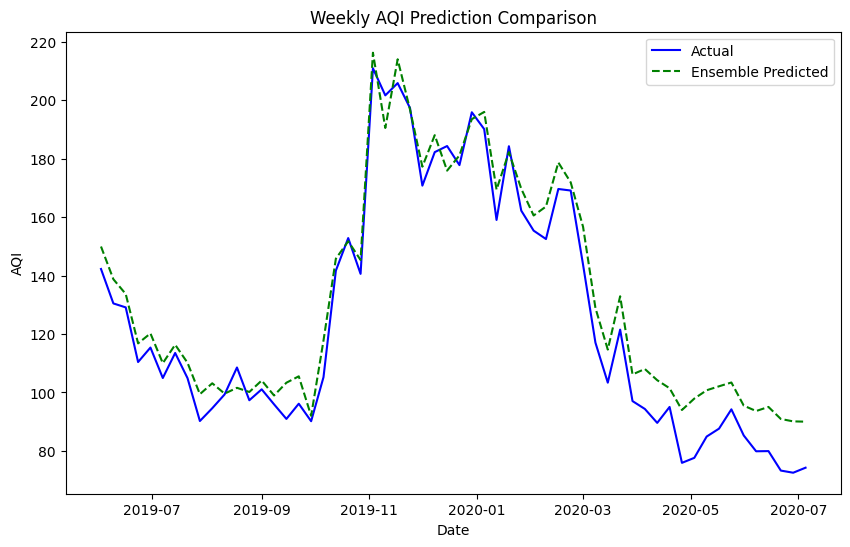

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define the Mean Absolute Percentage Error (MAPE) function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load your air quality data
# Replace this with your actual data loading code
data = pd.read_csv('city_hour.csv')

# Convert the 'Datetime' column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Prepare the data for analysis (weekly)
week = data.groupby([pd.Grouper(key='Datetime', freq='W')]).mean()

# Define the target variable (AQI)
target_variable = 'AQI'

# Define the features you want to include for modeling
selected_features = ['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'O3']

# Function to create features for modeling
def create_features(df):
    # Add any additional features you may have
    # For simplicity, we'll use only the selected features as lag features
    for i in range(1, 4):  # Lag features for the last 3 time steps
        for feature in selected_features:
            df[f'{feature}_lag_{i}'] = df[feature].shift(i)
    return df

# Apply feature engineering to weekly data
week = create_features(week)

# Define the features (X) and target (y) using the selected features
week_features = [col for col in week.columns if col in selected_features]

# Split the data into training and testing sets for weekly
week_train, week_test = train_test_split(week, test_size=0.2, shuffle=False)

# LightGBM Model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(week_train[week_features], week_train[target_variable])
lgb_pred = lgb_model.predict(week_test[week_features])

# SARIMAX Model
sarimax_order = (2, 0, 1)  # Example order, adjust as needed
sarimax_seasonal_order = (2, 0, 1, 52)  # Example seasonal_order, adjust as needed
sarimax_model = SARIMAX(week_train[target_variable], order=sarimax_order, seasonal_order=sarimax_seasonal_order, exog=week_train[week_features])
sarimax_results = sarimax_model.fit(disp=False)
sarimax_pred = sarimax_results.get_forecast(steps=len(week_test), exog=week_test[week_features]).predicted_mean

# Ensemble: Simple Average
ensemble_pred = (lgb_pred + sarimax_pred) / 2

# # Calculate evaluation metrics for LightGBM
# lgb_rmse = np.sqrt(mean_squared_error(week_test[target_variable], lgb_pred))
# lgb_mae = mean_absolute_error(week_test[target_variable], lgb_pred)
# lgb_r2 = r2_score(week_test[target_variable], lgb_pred)
# lgb_mape = mean_absolute_percentage_error(week_test[target_variable], lgb_pred)
# lgb_mse = mean_squared_error(week_test[target_variable], lgb_pred)

# # Calculate evaluation metrics for SARIMAX
# sarimax_rmse = np.sqrt(mean_squared_error(week_test[target_variable], sarimax_pred))
# sarimax_mae = mean_absolute_error(week_test[target_variable], sarimax_pred)
# sarimax_r2 = r2_score(week_test[target_variable], sarimax_pred)
# sarimax_mape = mean_absolute_percentage_error(week_test[target_variable], sarimax_pred)
# sarimax_mse = mean_squared_error(week_test[target_variable], sarimax_pred)

# Calculate evaluation metrics for Ensemble
ensemble_rmse = np.sqrt(mean_squared_error(week_test[target_variable], ensemble_pred))
ensemble_mae = mean_absolute_error(week_test[target_variable], ensemble_pred)
ensemble_r2 = r2_score(week_test[target_variable], ensemble_pred)
ensemble_mape = mean_absolute_percentage_error(week_test[target_variable], ensemble_pred)
ensemble_mse = mean_squared_error(week_test[target_variable], ensemble_pred)

# Print the evaluation metrics
# print("LightGBM Prediction Metrics:")
# print(f"RMSE: {lgb_rmse:.2f}")
# print(f"MAE: {lgb_mae:.2f}")
# print(f"R-squared: {lgb_r2:.2f}")
# print(f"MAPE: {lgb_mape:.2f}%")
# print(f"MSE: {lgb_mse:.2f}")
# print("\nSARIMAX Prediction Metrics:")
# print(f"RMSE: {sarimax_rmse:.2f}")
# print(f"MAE: {sarimax_mae:.2f}")
# print(f"R-squared: {sarimax_r2:.2f}")
# print(f"MAPE: {sarimax_mape:.2f}%")
# print(f"MSE: {sarimax_mse:.2f}")
print("\nEnsemble Prediction Metrics:")
print(f"RMSE: {ensemble_rmse:.2f}")
print(f"MAE: {ensemble_mae:.2f}")
print(f"R-squared: {ensemble_r2:.2f}")
print(f"MAPE: {ensemble_mape:.2f}%")
print(f"MSE: {ensemble_mse:.2f}")

# Plot the actual vs. predicted AQI values
plt.figure(figsize=(10, 6))
plt.plot(week_test.index, week_test[target_variable], label='Actual', color='blue')
# plt.plot(week_test.index, lgb_pred, label='LightGBM Predicted', color='orange')
# plt.plot(week_test.index, sarimax_pred, label='SARIMAX Predicted', color='green')
plt.plot(week_test.index, ensemble_pred, label='Ensemble Predicted', color='green', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Weekly AQI Prediction Comparison')
plt.legend()
plt.show()

**MONTH Wise AUTO-ARIMA**

In [ ]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima

# Load your air quality data
# Replace this with your actual data loading code
data = pd.read_csv('city_hour.csv')

# Convert the 'Datetime' column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Prepare the data for analysis (monthly)
month = data.groupby([pd.Grouper(key='Datetime', freq='M')]).mean()  # Monthly aggregation

# Define the target variable (AQI)
target_variable = 'AQI'

# Split the data into training and testing sets for monthly
train_month, test_month = train_test_split(month, test_size=0.2, shuffle=False)

# Define the features you want to include for modeling
selected_features = ['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'O3']

# Function to create features for modeling
def create_features(df):
    # Add any additional features you may have
    # For simplicity, we'll use only the selected features as lag features
    for i in range(1, 4):  # Lag features for the last 3 time steps
        for feature in selected_features:
            df[f'{feature}_lag_{i}'] = df[feature].shift(i)
    return df

# Apply feature engineering to monthly data
month = create_features(month)

# Define the features (X) and target (y) using the selected features
month_features = [col for col in month.columns if col in selected_features]
# If you want to include lag features, add them to month_features as well

# Find the best SARIMA order using auto_arima
stepwise_fit_month = auto_arima(train_month[target_variable], trace=True, suppress_warnings=True, seasonal=False)

# Print the summary of the best SARIMA order
print(stepwise_fit_month.summary())

# The best SARIMA order can be accessed using stepwise_fit_month.order
# The best seasonal order can be accessed using stepwise_fit_month.seasonal_order
# Use these values to fit and predict with SARIMA as previously shown


<ipython-input-12-32dba0692e23>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month = data.groupby([pd.Grouper(key='Datetime', freq='M')]).mean()  # Monthly aggregation


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=557.444, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=717.835, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=558.216, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=555.721, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=554.836, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=555.458, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=556.320, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=543.510, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=553.355, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=552.981, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=538.144, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=541.129, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=540.730, Time

**ENSEMBLED LGBM MONTH WISE ANALYSIS**

<ipython-input-34-e1322be8eb3a>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month = data.groupby([pd.Grouper(key='Datetime', freq='M')]).mean()  # Monthly aggregation
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 53, number of used features: 6
[LightGBM] [Info] Start training from score 197.121382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Ensemble Prediction Metrics:
RMSE: 15.65
MAE: 13.57
R-squared: 0.85
MAPE: 13.92%
MSE: 244.88


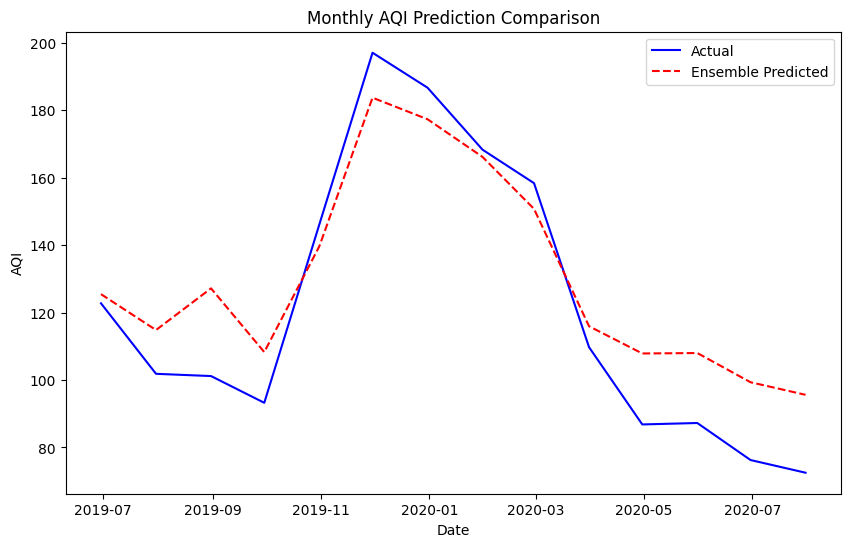

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define the Mean Absolute Percentage Error (MAPE) function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load your air quality data
# Replace this with your actual data loading code
data = pd.read_csv('city_hour.csv')

# Convert the 'Datetime' column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Prepare the data for analysis (monthly)
month = data.groupby([pd.Grouper(key='Datetime', freq='M')]).mean()  # Monthly aggregation

# Define the target variable (AQI)
target_variable = 'AQI'

# Define the features you want to include for modeling
selected_features = ['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'O3']

# Function to create features for modeling
def create_features(df):
    # Add any additional features you may have
    # For simplicity, we'll use only the selected features as lag features
    for i in range(1, 4):  # Lag features for the last 3 time steps
        for feature in selected_features:
            df[f'{feature}_lag_{i}'] = df[feature].shift(i)
    return df

# Apply feature engineering to monthly data
month = create_features(month)

# Define the features (X) and target (y) using the selected features
month_features = [col for col in month.columns if col in selected_features]

# Split the data into training and testing sets for monthly
month_train, month_test = train_test_split(month, test_size=0.2, shuffle=False)

# LightGBM Model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(month_train[month_features], month_train[target_variable])
lgb_pred = lgb_model.predict(month_test[month_features])

# SARIMAX Model
sarimax_order = (2, 0, 1)  # Example order, adjust as needed
sarimax_seasonal_order = (2, 0, 1, 12)  # Example seasonal_order, adjust as needed
sarimax_model = SARIMAX(month_train[target_variable], order=sarimax_order,
                        seasonal_order=sarimax_seasonal_order, exog=month_train[month_features])
sarimax_results = sarimax_model.fit(disp=False)
sarimax_pred = sarimax_results.get_forecast(steps=len(month_test),
                                            exog=month_test[month_features]).predicted_mean

# Ensemble: Simple Average
ensemble_pred = (lgb_pred + sarimax_pred) / 2

# Calculate evaluation metrics for Ensemble
ensemble_rmse = np.sqrt(mean_squared_error(month_test[target_variable], ensemble_pred))
ensemble_mae = mean_absolute_error(month_test[target_variable], ensemble_pred)
ensemble_r2 = r2_score(month_test[target_variable], ensemble_pred)
ensemble_mape = mean_absolute_percentage_error(month_test[target_variable], ensemble_pred)
ensemble_mse = mean_squared_error(month_test[target_variable], ensemble_pred)

print("\nEnsemble Prediction Metrics:")
print(f"RMSE: {ensemble_rmse:.2f}")
print(f"MAE: {ensemble_mae:.2f}")
print(f"R-squared: {ensemble_r2:.2f}")
print(f"MAPE: {ensemble_mape:.2f}%")
print(f"MSE: {ensemble_mse:.2f}")

# Plot the actual vs. predicted AQI values
plt.figure(figsize=(10, 6))
plt.plot(month_test.index, month_test[target_variable], label='Actual', color='blue')
plt.plot(month_test.index, ensemble_pred, label='Ensemble Predicted', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Monthly AQI Prediction Comparison')
plt.legend()
plt.show()


**Outliers Detection**

Before Removing Outliers: 384243 outliers detected


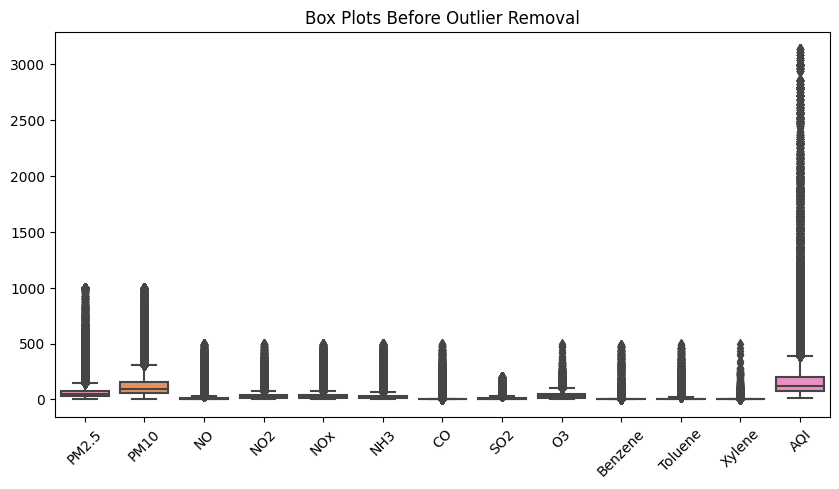

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('city_hour.csv')

# Define a function to detect outliers using IQR
def detect_outliers_iqr(column):
    # Convert the column to numeric, ignoring non-numeric values
    column_numeric = pd.to_numeric(column, errors='coerce')

    # Filter out non-numeric values and calculate IQR for the numeric values
    valid_values = column_numeric.dropna()
    Q1 = valid_values.quantile(0.25)
    Q3 = valid_values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a boolean mask for outliers
    is_outlier = (column_numeric < lower_bound) | (column_numeric > upper_bound)
    return is_outlier

# Drop specific columns before outlier detection and removal
columns_to_drop = ["City", "AQI_Bucket"]
data.drop(columns=columns_to_drop, inplace=True)

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

# Exclude non-numeric columns from outlier detection
outlier_flags_before = data.drop(columns=non_numeric_columns).apply(detect_outliers_iqr)

# Print total number of detected outliers before removal
total_outliers_before = outlier_flags_before.sum().sum()
print(f"Before Removing Outliers: {total_outliers_before} outliers detected")

# Create box plots for each column before outlier removal
plt.figure(figsize=(10, 5))
sns.boxplot(data=data.drop(columns=non_numeric_columns))
plt.title('Box Plots Before Outlier Removal')
plt.xticks(rotation=45)
plt.show()

# Rest of your code for individual box plots goes here...


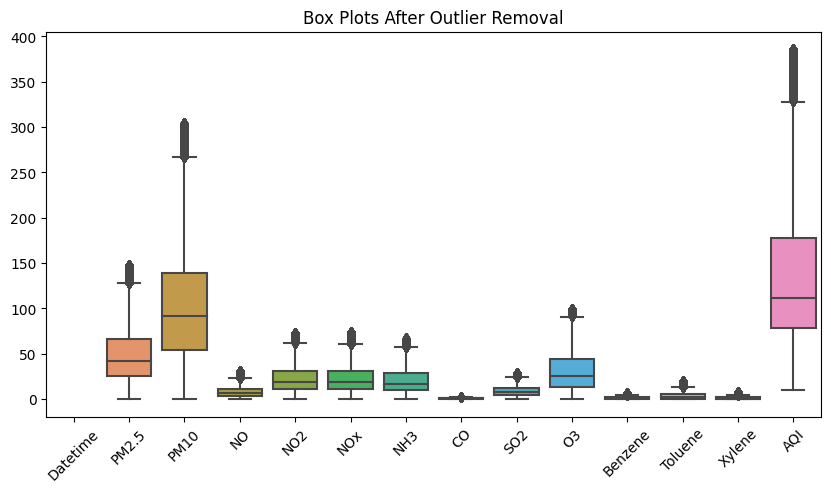

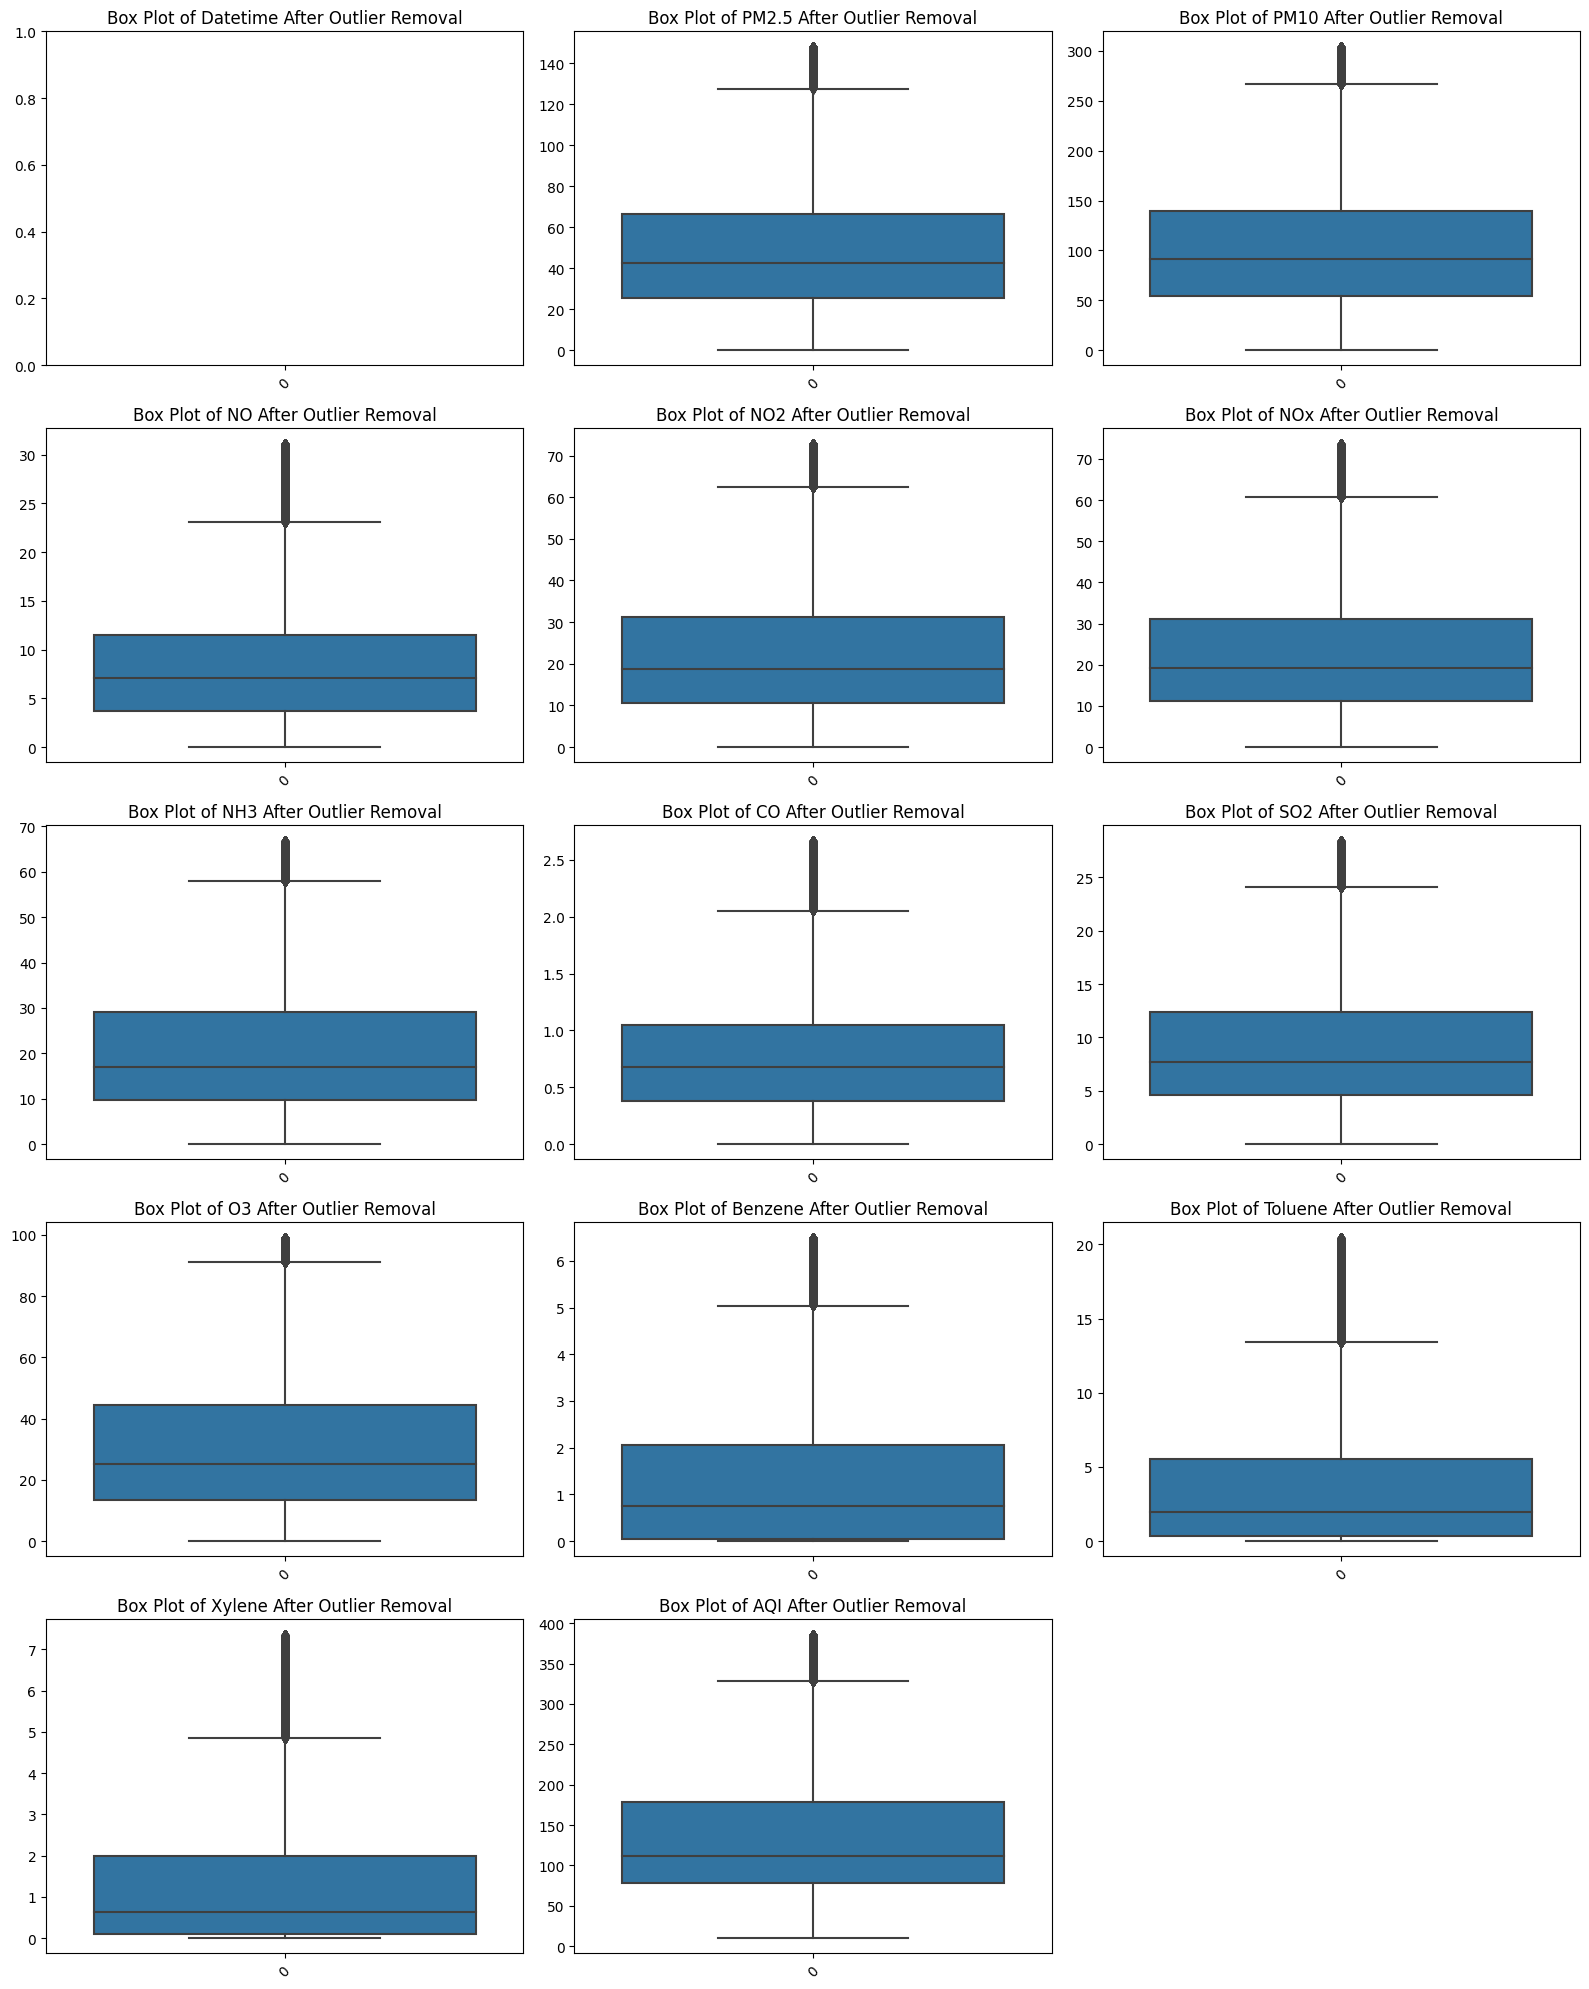

Before Removing Outliers : 384243
After Removing Outliers : 153825
Outliers Removed in Total: 230418


In [ ]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(column):
    column_numeric = pd.to_numeric(column, errors='coerce')
    valid_values = column_numeric.dropna()
    Q1 = valid_values.quantile(0.25)
    Q3 = valid_values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace the outliers with NaN
    column_numeric[(column_numeric < lower_bound) | (column_numeric > upper_bound)] = None
    return column_numeric

# Remove outliers for each specified column
for column in data.columns:
    data[column] = remove_outliers_iqr(data[column])

# Create box plots for each column after outlier removal
plt.figure(figsize=(10, 5))
sns.boxplot(data=data)
plt.title('Box Plots After Outlier Removal')
plt.xticks(rotation=45)
plt.show()

# Get the number of columns in the dataset
num_columns = len(data.columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_columns + 2) // 3  # Adjust the number of rows as needed
num_cols = min(num_columns, 3)

# Create individual box plots for each column
plt.figure(figsize=(16, 20))
for i, column in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=data[column])
    plt.title(f'Box Plot of {column} After Outlier Removal')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Apply the IQR method to detect outliers for the entire dataset after removal
outlier_flags_after = data.apply(detect_outliers_iqr)

# Print total number of detected outliers before removal
total_outliers_before = outlier_flags_before.sum().sum()
print(f"Before Removing Outliers : {total_outliers_before}")

# Print total number of detected outliers after removal
total_outliers_after = outlier_flags_after.sum().sum()
print(f"After Removing Outliers : {total_outliers_after}")

# Calculate and print the total number of outliers removed
outliers_removed = total_outliers_before - total_outliers_after
print(f"Outliers Removed in Total: {outliers_removed}")

<ipython-input-8-bf1d54eef8da>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month = data.groupby([pd.Grouper(key='Datetime', freq='M')]).mean()  # Monthly aggregation
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 53, number of used features: 6
[LightGBM] [Info] Start training from score 197.121382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 53, number of used features: 6
[LightGBM] [Info] Start training from score 197.121382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

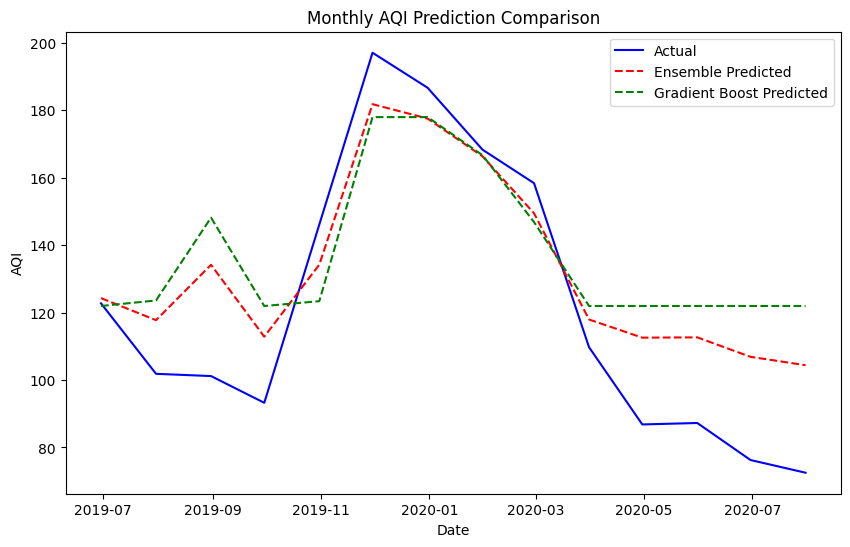

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define the Mean Absolute Percentage Error (MAPE) function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load your air quality data
# Replace this with your actual data loading code
data = pd.read_csv('city_hour.csv')

# Convert the 'Datetime' column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Prepare the data for analysis (monthly)
month = data.groupby([pd.Grouper(key='Datetime', freq='M')]).mean()  # Monthly aggregation

# Define the target variable (AQI)
target_variable = 'AQI'

# Define the features you want to include for modeling
selected_features = ['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'O3']

# Function to create features for modeling
def create_features(df):
    # Add any additional features you may have
    # For simplicity, we'll use only the selected features as lag features
    for i in range(1, 4):  # Lag features for the last 3 time steps
        for feature in selected_features:
            df[f'{feature}_lag_{i}'] = df[feature].shift(i)
    return df


# Apply feature engineering to monthly data
month = create_features(month)

# Define the features (X) and target (y) using the selected features
month_features = [col for col in month.columns if col in selected_features]

# Split the data into training and testing sets for monthly
month_train, month_test = train_test_split(month, test_size=0.2, shuffle=False)

# LightGBM Model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(month_train[month_features], month_train[target_variable])
lgb_pred = lgb_model.predict(month_test[month_features])

# SARIMAX Model
sarimax_order = (2, 0, 1)  # Example order, adjust as needed
sarimax_seasonal_order = (2, 0, 1, 12)  # Example seasonal_order, adjust as needed
sarimax_model = SARIMAX(month_train[target_variable], order=sarimax_order,
                        seasonal_order=sarimax_seasonal_order, exog=month_train[month_features])
sarimax_results = sarimax_model.fit(disp=False)
sarimax_pred = sarimax_results.get_forecast(steps=len(month_test),
                                            exog=month_test[month_features]).predicted_mean

# Train the Gradient Boosting Model (LightGBM in this case)
gradient_boost_model = lgb.LGBMRegressor()
gradient_boost_model.fit(month_train[month_features], month_train[target_variable])
gradient_boost_pred = gradient_boost_model.predict(month_test[month_features])

# Ensemble: Simple Average
ensemble_pred = (lgb_pred + sarimax_pred + gradient_boost_pred) / 3

# Calculate evaluation metrics for Ensemble
ensemble_rmse = np.sqrt(mean_squared_error(month_test[target_variable], ensemble_pred))
ensemble_mae = mean_absolute_error(month_test[target_variable], ensemble_pred)
ensemble_r2 = r2_score(month_test[target_variable], ensemble_pred)
ensemble_mape = mean_absolute_percentage_error(month_test[target_variable], ensemble_pred)
ensemble_mse = mean_squared_error(month_test[target_variable], ensemble_pred)

# Print the evaluation metrics
print("\nEnsemble Prediction Metrics:")
print(f"RMSE: {ensemble_rmse:.2f}")
print(f"MAE: {ensemble_mae:.2f}")
print(f"R-squared: {ensemble_r2:.2f}")
print(f"MAPE: {ensemble_mape:.2f}%")
print(f"MSE: {ensemble_mse:.2f}")

# Plot the actual vs. predicted AQI values
plt.figure(figsize=(10, 6))
plt.plot(month_test.index, month_test[target_variable], label='Actual', color='blue')
plt.plot(month_test.index, ensemble_pred, label='Ensemble Predicted', color='red', linestyle='dashed')
plt.plot(month_test.index, gradient_boost_pred, label='Gradient Boost Predicted', color='green', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Monthly AQI Prediction Comparison')
plt.legend()
plt.show()


<ipython-input-3-1ff436d75fe9>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week = data.groupby([pd.Grouper(key='Datetime', freq='W')]).mean()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 702
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 9
[LightGBM] [Info] Start training from score 197.136598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 702
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 9
[LightGBM] [Info] Start training from score 197.136598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

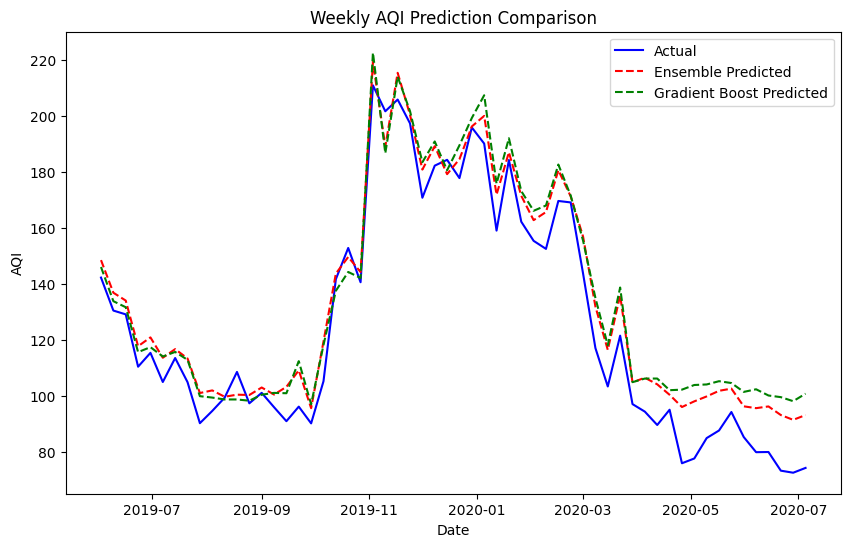

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define the Mean Absolute Percentage Error (MAPE) function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load your air quality data
# Replace this with your actual data loading code
data = pd.read_csv('city_hour.csv')

# Convert the 'Datetime' column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Prepare the data for analysis (weekly)
week = data.groupby([pd.Grouper(key='Datetime', freq='W')]).mean()

# Define the target variable (AQI)
target_variable = 'AQI'

# Define the features you want to include for modeling
selected_features = ['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'O3', 'NO2', 'SO2', 'NO']

# Function to create features for modeling
def create_features(df):
    # Add any additional features you may have
    # For simplicity, we'll use only the selected features as lag features
    for i in range(1, 4):  # Lag features for the last 3 time steps
        for feature in selected_features:
            df[f'{feature}_lag_{i}'] = df[feature].shift(i)
    return df

# Apply feature engineering to weekly data
week = create_features(week)

# Define the features (X) and target (y) using the selected features
week_features = [col for col in week.columns if col in selected_features]

# Split the data into training and testing sets for weekly
week_train, week_test = train_test_split(week, test_size=0.2, shuffle=False)

# LightGBM Model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(week_train[week_features], week_train[target_variable])
lgb_pred = lgb_model.predict(week_test[week_features])

# SARIMAX Model
sarimax_order = (2, 0, 1)  # Example order, adjust as needed
sarimax_seasonal_order = (2, 0, 1, 52)  # Example seasonal_order, adjust as needed
sarimax_model = SARIMAX(week_train[target_variable], order=sarimax_order,
                        seasonal_order=sarimax_seasonal_order, exog=week_train[week_features])
sarimax_results = sarimax_model.fit(disp=False)
sarimax_pred = sarimax_results.get_forecast(steps=len(week_test),
                                            exog=week_test[week_features]).predicted_mean

# Train the Gradient Boosting Model (LightGBM in this case)
gradient_boost_model = lgb.LGBMRegressor()
gradient_boost_model.fit(week_train[week_features], week_train[target_variable])
gradient_boost_pred = gradient_boost_model.predict(week_test[week_features])

# Ensemble: Simple Average
ensemble_pred = (lgb_pred + sarimax_pred + gradient_boost_pred) / 3

# Calculate evaluation metrics for Ensemble
ensemble_rmse = np.sqrt(mean_squared_error(week_test[target_variable], ensemble_pred))
ensemble_mae = mean_absolute_error(week_test[target_variable], ensemble_pred)
ensemble_r2 = r2_score(week_test[target_variable], ensemble_pred)
ensemble_mape = mean_absolute_percentage_error(week_test[target_variable], ensemble_pred)
ensemble_mse = mean_squared_error(week_test[target_variable], ensemble_pred)

# Print the evaluation metrics
print("\nEnsemble Prediction Metrics:")
print(f"RMSE: {ensemble_rmse:.2f}")
print(f"MAE: {ensemble_mae:.2f}")
print(f"R-squared: {ensemble_r2:.2f}")
print(f"MAPE: {ensemble_mape:.2f}%")
print(f"MSE: {ensemble_mse:.2f}")

# Plot the actual vs. predicted AQI values
plt.figure(figsize=(10, 6))
plt.plot(week_test.index, week_test[target_variable], label='Actual', color='blue')
plt.plot(week_test.index, ensemble_pred, label='Ensemble Predicted', color='red', linestyle='dashed')
plt.plot(week_test.index, gradient_boost_pred, label='Gradient Boost Predicted', color='green', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Weekly AQI Prediction Comparison')
plt.legend()
plt.show()